## Global Feature Importance

In [1]:
import pandas as pd
import numpy as np
import time

import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

save_figures = False
figure_path = "../figures/evaluation/"
# df_init = pd.read_parquet("../data/init.parquet")
# df_before = pd.read_parquet("../data/before_split.parquet")
# df_train = pd.read_parquet("../data/prep_train.parquet")
# df_val = pd.read_parquet("../data/prep_val.parquet")
# df_test = pd.read_parquet("../data/prep_test.parquet")
# df_tt_train = pd.read_parquet("../data/prep_tt_train.parquet")
# df_tt_test = pd.read_parquet("../data/prep_tt_test.parquet")
df_all = pd.read_parquet("../data/prep_all.parquet")

In [2]:
df_all.head()

,Year_Y2015,Year_Y2016,Country_England,Country_Wales,Supermarket_Asda,Supermarket_Tesco Extra,Supermarket_Tesco Metro,Supermarket_Waitrose,Time_Evening,Time_Morning,...,YearCountryAge_Y2016EnglandAge_g2,YearCountryAge_Y2016EnglandAge_g3,YearCountryAge_Y2016WalesAge_g1,YearCountryAge_Y2016WalesAge_g2,YearCountryAge_Y2016WalesAge_g3,YearCountryAge_nan,ObsSize,FemaleN,MaleN,y
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.471136,-1.156159,0.871226,1
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,-0.471136,-1.156159,0.871226,1
2,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,-0.471136,0.583858,-0.993069,1
3,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.811174,2.323876,-0.993069,1
4,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,-0.471136,0.583858,-0.993069,1


In [3]:
X_all = df_all.iloc[:,0:-1].to_numpy()
y_all = df_all["y"].to_numpy()

### Measure 1: Logistic Regression Coefficient

In [4]:
final_scaler = StandardScaler()
feature_names = df_all.columns[0:-1]

In [5]:
X_all_scaled = final_scaler.fit_transform(X_all)
X_all_scaled

array([[-0.87728478,  0.87728478, -0.95886853, ..., -0.47113558,
        -1.15615943,  0.87122573],
       [-0.87728478,  0.87728478, -0.95886853, ..., -0.47113558,
        -1.15615943,  0.87122573],
       [-0.87728478,  0.87728478, -0.95886853, ..., -0.47113558,
         0.5838582 , -0.99306855],
       ...,
       [ 1.13988071, -1.13988071,  1.04289584, ..., -0.47113558,
         0.5838582 , -0.99306855],
       [ 1.13988071, -1.13988071,  1.04289584, ..., -0.47113558,
         0.5838582 , -0.99306855],
       [ 1.13988071, -1.13988071,  1.04289584, ..., -0.47113558,
         0.5838582 , -0.99306855]])

In [6]:
random_state_LR = 132
LR_l2 = LogisticRegression(penalty = 'l2', 
                           solver = 'saga', 
                           random_state = random_state_LR,
                           fit_intercept = False, 
                           max_iter = 10000, 
                           class_weight = 'balanced')
LR_l2

LogisticRegression(class_weight='balanced', fit_intercept=False, max_iter=10000,
                   random_state=132, solver='saga')

In [7]:
c_penalty = np.logspace(-3, 2, 21)
params_l2 = {'C':c_penalty}
random_states_split = [123, 456, 789, 
                       741, 852, 963, 
                       159, 753, 951, 357]

gridCV_l2 = GridSearchCV(estimator = LR_l2, 
                         param_grid = params_l2, 
                         scoring = 'balanced_accuracy', 
                         n_jobs = -2,
                         refit = True, 
                         cv = 5, 
                         verbose = 1)

In [8]:
%%time

Lin_coefs = []

for each_rs in random_states_split:
    start_time = time.time()
    
    X_other_temp, X_test_temp, y_other_temp, y_test_temp = \
        train_test_split(X_all, y_all, 
                         test_size = 0.1, 
                         random_state = each_rs, 
                         stratify = y_all)
    
    gridCV_l2.fit(X_other_temp, y_other_temp)
    
    Lin_coefs.append(gridCV_l2.best_estimator_.coef_.reshape(-1))
    
    print(gridCV_l2.best_params_, flush = True)
    
    end_time = time.time()
    print(f"Iteration {each_rs}: {end_time - start_time:.3f} seconds", flush = True)

Fitting 5 folds for each of 21 candidates, totalling 105 fits
{'C': 0.005623413251903491}
Iteration 123: 7.730 seconds
Fitting 5 folds for each of 21 candidates, totalling 105 fits
{'C': 0.1}
Iteration 456: 7.129 seconds
Fitting 5 folds for each of 21 candidates, totalling 105 fits
{'C': 0.1}
Iteration 789: 7.057 seconds
Fitting 5 folds for each of 21 candidates, totalling 105 fits
{'C': 0.01778279410038923}
Iteration 741: 7.051 seconds
Fitting 5 folds for each of 21 candidates, totalling 105 fits
{'C': 0.03162277660168379}
Iteration 852: 7.306 seconds
Fitting 5 folds for each of 21 candidates, totalling 105 fits
{'C': 0.31622776601683794}
Iteration 963: 7.236 seconds
Fitting 5 folds for each of 21 candidates, totalling 105 fits
{'C': 0.03162277660168379}
Iteration 159: 7.532 seconds
Fitting 5 folds for each of 21 candidates, totalling 105 fits
{'C': 0.01}
Iteration 753: 7.508 seconds
Fitting 5 folds for each of 21 candidates, totalling 105 fits
{'C': 0.5623413251903491}
Iteration 951:

In [9]:
Lin_coefs_array = np.array(Lin_coefs)
Lin_coefs_array.shape

(10, 85)

In [10]:
Lin_coefs_df = pd.DataFrame(data = Lin_coefs_array, 
                            columns = feature_names)
Lin_coefs_df = pd.concat([Lin_coefs_df, 
                          Lin_coefs_df.agg(["mean", "std"])])
Lin_coefs_df

,Year_Y2015,Year_Y2016,Country_England,Country_Wales,Supermarket_Asda,Supermarket_Tesco Extra,Supermarket_Tesco Metro,Supermarket_Waitrose,Time_Evening,Time_Morning,...,YearCountryAge_Y2016EnglandAge_g1,YearCountryAge_Y2016EnglandAge_g2,YearCountryAge_Y2016EnglandAge_g3,YearCountryAge_Y2016WalesAge_g1,YearCountryAge_Y2016WalesAge_g2,YearCountryAge_Y2016WalesAge_g3,YearCountryAge_nan,ObsSize,FemaleN,MaleN
0,-0.124770,0.162712,-0.212171,0.250113,0.284817,-0.093454,-0.116832,-0.036589,-0.064166,0.070850,...,-0.029229,0.061590,0.051824,-0.034251,-0.025773,0.081511,0.052069,-0.019906,-0.022404,-0.034903
1,-0.128107,0.191522,-0.336355,0.399770,0.700510,-0.244508,-0.299274,-0.093312,-0.115738,0.198631,...,-0.123286,0.221737,-0.033649,-0.170272,-0.176580,0.274422,0.209317,-0.113035,-0.272244,-0.076397
2,-0.102322,0.167986,-0.330059,0.395724,0.662986,-0.259345,-0.209962,-0.128015,-0.089619,0.186823,...,-0.166136,0.206178,0.012839,-0.098173,-0.182774,0.300833,0.173790,-0.042320,-0.304781,-0.105452
3,-0.111530,0.159241,-0.269589,0.317300,0.435796,-0.169306,-0.155635,-0.063144,-0.094361,0.102831,...,-0.069919,0.156777,0.016886,-0.094746,-0.117860,0.199801,0.087280,-0.002753,-0.093899,-0.043655
4,-0.123218,0.184351,-0.315723,0.376856,0.513255,-0.219684,-0.176746,-0.055693,-0.095213,0.127680,...,-0.081956,0.195650,0.028105,-0.127216,-0.130929,0.168428,0.144187,-0.031296,-0.231923,-0.080176
5,-0.121818,0.211670,-0.384278,0.474130,0.760589,-0.259941,-0.285809,-0.124986,-0.102775,0.170149,...,-0.136412,0.219098,-0.086839,-0.148470,-0.217585,0.339416,0.271679,0.073479,-0.617124,-0.400144
6,-0.118126,0.169170,-0.298971,0.350016,0.509272,-0.198457,-0.213252,-0.046518,-0.099449,0.085816,...,-0.094450,0.207028,0.004052,-0.100725,-0.146867,0.245614,0.134990,-0.080630,-0.165976,-0.058688
7,-0.140652,0.182418,-0.235168,0.276933,0.359237,-0.143301,-0.147882,-0.026290,-0.095442,0.088866,...,-0.029268,0.099624,0.018716,-0.081788,-0.038502,0.130089,0.079955,-0.015663,-0.091312,-0.017706
8,-0.076105,0.159158,-0.402877,0.485930,0.792422,-0.249217,-0.273718,-0.186435,-0.148142,0.127918,...,-0.147474,0.303960,-0.008920,-0.154268,-0.197724,0.367443,0.285209,-0.096151,-0.352884,-0.181884
9,-0.054366,0.140617,-0.366689,0.452940,0.706171,-0.225999,-0.281201,-0.112719,-0.095165,0.148107,...,-0.146844,0.284981,-0.007668,-0.077414,-0.166261,0.268225,0.201467,-0.006488,-0.356578,-0.181780


In [11]:
Lin_coefs_df_transposed = Lin_coefs_df.T
Lin_coefs_df_transposed["abs_mean"] = Lin_coefs_df_transposed["mean"].abs()
Lin_coefs_df_transposed = Lin_coefs_df_transposed\
                              .sort_values(by = "abs_mean", 
                                           ascending = False, 
                                           ignore_index = False)
Lin_coefs_df_transposed

,0,1,2,3,4,5,6,7,8,9,mean,std,abs_mean
YearCountrySupermarket_Y2015WalesAsda,0.187537,0.949565,0.988661,0.398971,0.552927,1.502747,0.529541,0.278636,1.786831,1.208177,0.838359,0.539495,0.838359
Supermarket_Asda,0.284817,0.700510,0.662986,0.435796,0.513255,0.760589,0.509272,0.359237,0.792422,0.706171,0.572505,0.176580,0.572505
YearCountry_Y2015England,-0.332624,-0.500183,-0.514156,-0.411505,-0.459806,-0.618392,-0.464283,-0.380537,-0.628879,-0.564674,-0.487504,0.098012,0.487504
YearCountrySupermarket_Y2015EnglandAsda,-0.078981,-0.431545,-0.455214,-0.218058,-0.288824,-0.663334,-0.266848,-0.105247,-0.756452,-0.553435,-0.381794,0.229444,0.381794
YearCountrySupermarket_Y2015WalesWaitrose,-0.072253,-0.482339,-0.493073,-0.189608,-0.228259,-0.625954,-0.236686,-0.146587,-0.745688,-0.593613,-0.381406,0.233831,0.381406
...,...,...,...,...,...,...,...,...,...,...,...,...,...
YearCountryTime_Y2015WalesEvening,0.035399,0.029981,-0.053161,0.036879,0.010269,0.043012,0.014301,0.011985,-0.029660,0.071410,0.017042,0.036081,0.017042
YearCountryAge_Y2015WalesAge_g3,0.045829,-0.045440,-0.021173,-0.009895,0.052318,-0.009310,-0.010395,0.038007,-0.155493,-0.024183,-0.013973,0.059533,0.013973
YearCountryTime_Y2015EnglandSatMorning,-0.015935,-0.008292,0.050788,-0.020595,-0.017309,0.049948,-0.030216,-0.019759,0.037085,0.064891,0.009061,0.036802,0.009061
YearCountry_Y2016Wales,0.042259,0.027694,-0.016111,0.017324,0.040268,-0.022444,0.003859,0.037049,-0.066844,-0.057368,0.000569,0.039974,0.000569


In [12]:
Lin_coefs_df_transposed = Lin_coefs_df_transposed.drop(columns = ["mean", "std", "abs_mean"])
Lin_coefs_df_ordered = Lin_coefs_df_transposed.T
Lin_coefs_df_ordered

,YearCountrySupermarket_Y2015WalesAsda,Supermarket_Asda,YearCountry_Y2015England,YearCountrySupermarket_Y2015EnglandAsda,YearCountrySupermarket_Y2015WalesWaitrose,Country_Wales,YearCountry_Y2015Wales,Country_England,YearCountryTime_Y2015WalesMorning,Age_Age_g1,...,Child_Child,YearCountrySupermarket_Y2015WalesTesco Extra,YearCountrySupermarket_Y2016EnglandTesco Extra,YearCountrySupermarket_Y2016WalesAsda,YearCountrySupermarket_Y2016WalesTesco Extra,YearCountryTime_Y2015WalesEvening,YearCountryAge_Y2015WalesAge_g3,YearCountryTime_Y2015EnglandSatMorning,YearCountry_Y2016Wales,YearCountryAge_Y2016EnglandAge_g3
0,0.187537,0.284817,-0.332624,-0.078981,-0.072253,0.250113,0.207854,-0.212171,0.119313,-0.139128,...,0.010847,0.069163,-0.010499,0.058386,-0.010483,0.035399,0.045829,-0.015935,0.042259,0.051824
1,0.949565,0.700510,-0.500183,-0.431545,-0.482339,0.399770,0.372076,-0.336355,0.327139,-0.295053,...,-0.067408,-0.053952,0.045959,0.039090,0.023008,0.029981,-0.045440,-0.008292,0.027694,-0.033649
2,0.988661,0.662986,-0.514156,-0.455214,-0.493073,0.395724,0.411834,-0.330059,0.439838,-0.306964,...,-0.059931,-0.023871,-0.014495,-0.023597,0.013051,-0.053161,-0.021173,0.050788,-0.016111,0.012839
3,0.398971,0.435796,-0.411505,-0.218058,-0.189608,0.317300,0.299975,-0.269589,0.194808,-0.207778,...,-0.029304,0.058594,0.000756,0.065547,-0.024942,0.036879,-0.009895,-0.020595,0.017324,0.016886
4,0.552927,0.513255,-0.459806,-0.288824,-0.228259,0.376856,0.336588,-0.315723,0.275635,-0.251203,...,-0.004674,0.009743,-0.025500,0.070565,0.010689,0.010269,0.052318,-0.017309,0.040268,0.028105
5,1.502747,0.760589,-0.618392,-0.663334,-0.625954,0.474130,0.496575,-0.384278,0.502739,-0.330143,...,0.003477,-0.141324,0.064193,-0.197671,0.093957,0.043012,-0.009310,0.049948,-0.022444,-0.086839
6,0.529541,0.509272,-0.464283,-0.266848,-0.236686,0.350016,0.346157,-0.298971,0.235606,-0.250367,...,-0.054688,0.035468,-0.009583,0.052473,-0.009857,0.014301,-0.010395,-0.030216,0.003859,0.004052
7,0.278636,0.359237,-0.380537,-0.105247,-0.146587,0.276933,0.239884,-0.235168,0.155991,-0.194416,...,-0.010672,0.067490,0.000077,0.063815,-0.045448,0.011985,0.038007,-0.019759,0.037049,0.018716
8,1.786831,0.792422,-0.628879,-0.756452,-0.745688,0.485930,0.552774,-0.402877,0.481800,-0.293649,...,-0.054395,-0.289911,0.222628,-0.280680,0.127143,-0.029660,-0.155493,0.037085,-0.066844,-0.008920
9,1.208177,0.706171,-0.564674,-0.553435,-0.593613,0.452940,0.510308,-0.366689,0.386397,-0.305793,...,-0.042100,-0.039171,0.003449,-0.101675,0.058267,0.071410,-0.024183,0.064891,-0.057368,-0.007668


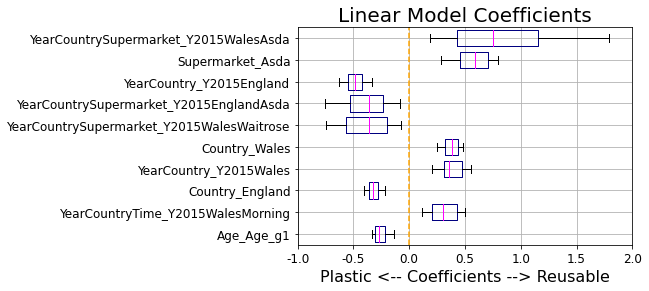

In [17]:
fig_box_lin_top10, ax_box_lin_top10 = plt.subplots()

Lin_coefs_df_top10 = Lin_coefs_df_ordered.iloc[:, 9::-1]
Lin_coefs_df_top10.boxplot(ax = ax_box_lin_top10, 
                           widths = 0.75,
                           boxprops = {'color':'navy'}, 
                           medianprops = {'color':'magenta'}, 
                           whiskerprops = {'color':'black'}, 
                           vert = False)

ax_box_lin_top10.set_xticks(ax_box_lin_top10.get_xticks())
ax_box_lin_top10.set_yticks(ax_box_lin_top10.get_yticks())

xticks_lin_top10 = ax_box_lin_top10.get_xticks()
xticklabels_lin_top10 = [f"{x:.1f}" for x in xticks_lin_top10]

ax_box_lin_top10.set_xticklabels(xticklabels_lin_top10, fontsize = 12)
ax_box_lin_top10.set_yticklabels(ax_box_lin_top10.get_yticklabels(), fontsize = 12)

ax_box_lin_top10.set_xlabel("Plastic <-- Coefficients --> Reusable", 
                            fontsize = 16) 
#ax_box_lin_top10.set_ylabel("Feature Importance", fontsize = 12)
ax_box_lin_top10.set_title("Linear Model Coefficients", fontsize = 20)

ax_box_lin_top10.axvline(x = 0, 
                         color = "orange", 
                         linestyle = "dashed")

fig_box_lin_top10.set_size_inches([6, 4])

# save_figures
if save_figures:
    fig_name = f"{figure_path}Linear Model Coef Top 10"
    fig_box_lin_top10.savefig(f"{fig_name}.pdf", 
                              dpi = 300, 
                              bbox_inches="tight")
    fig_box_lin_top10.savefig(f"{fig_name}.png", 
                              dpi = 300, 
                              bbox_inches="tight")
    fig_box_lin_top10.savefig(f"{fig_name}.svg", 
                              dpi = 300, 
                              bbox_inches="tight")

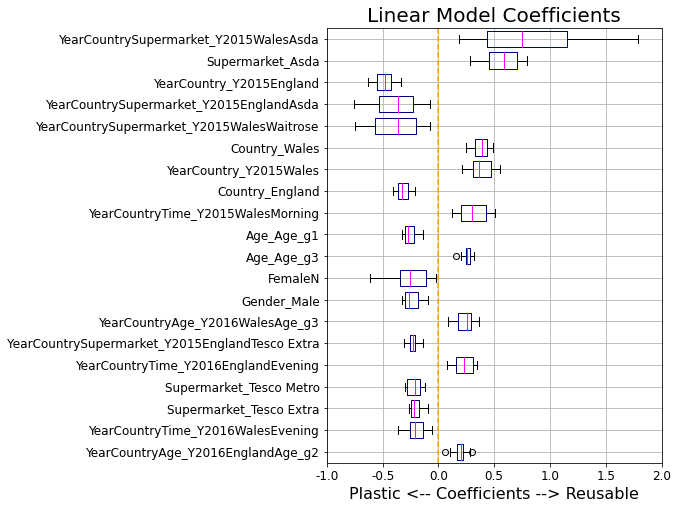

In [19]:
fig_box_lin_top20, ax_box_lin_top20 = plt.subplots()

Lin_coefs_df_top20 = Lin_coefs_df_ordered.iloc[:, 19::-1]
Lin_coefs_df_top20.boxplot(ax = ax_box_lin_top20, 
                           widths = 0.75,
                           boxprops = {'color':'navy'}, 
                           medianprops = {'color':'magenta'}, 
                           whiskerprops = {'color':'black'}, 
                           vert = False)

ax_box_lin_top20.set_xticks(ax_box_lin_top20.get_xticks())
ax_box_lin_top20.set_yticks(ax_box_lin_top20.get_yticks())

xticks_lin_top20 = ax_box_lin_top20.get_xticks()
xticklabels_lin_top20 = [f"{x:.1f}" for x in xticks_lin_top20]

ax_box_lin_top20.set_xticklabels(xticklabels_lin_top20, fontsize = 12)
ax_box_lin_top20.set_yticklabels(ax_box_lin_top20.get_yticklabels(), fontsize = 12)

ax_box_lin_top20.set_xlabel("Plastic <-- Coefficients --> Reusable", 
                            fontsize = 16) 
#ax_box_lin_top20.set_ylabel("Feature Importance", fontsize = 12)
ax_box_lin_top20.set_title("Linear Model Coefficients", fontsize = 20)

ax_box_lin_top20.axvline(x = 0, 
                         color = "orange", 
                         linestyle = "dashed")

fig_box_lin_top20.set_size_inches([6, 8])

# save_figures
if save_figures:
    fig_name = f"{figure_path}Linear Model Coef Top 20"
    fig_box_lin_top20.savefig(f"{fig_name}.pdf", 
                              dpi = 300, 
                              bbox_inches="tight")
    fig_box_lin_top20.savefig(f"{fig_name}.png", 
                              dpi = 300, 
                              bbox_inches="tight")
    fig_box_lin_top20.savefig(f"{fig_name}.svg", 
                              dpi = 300, 
                              bbox_inches="tight")

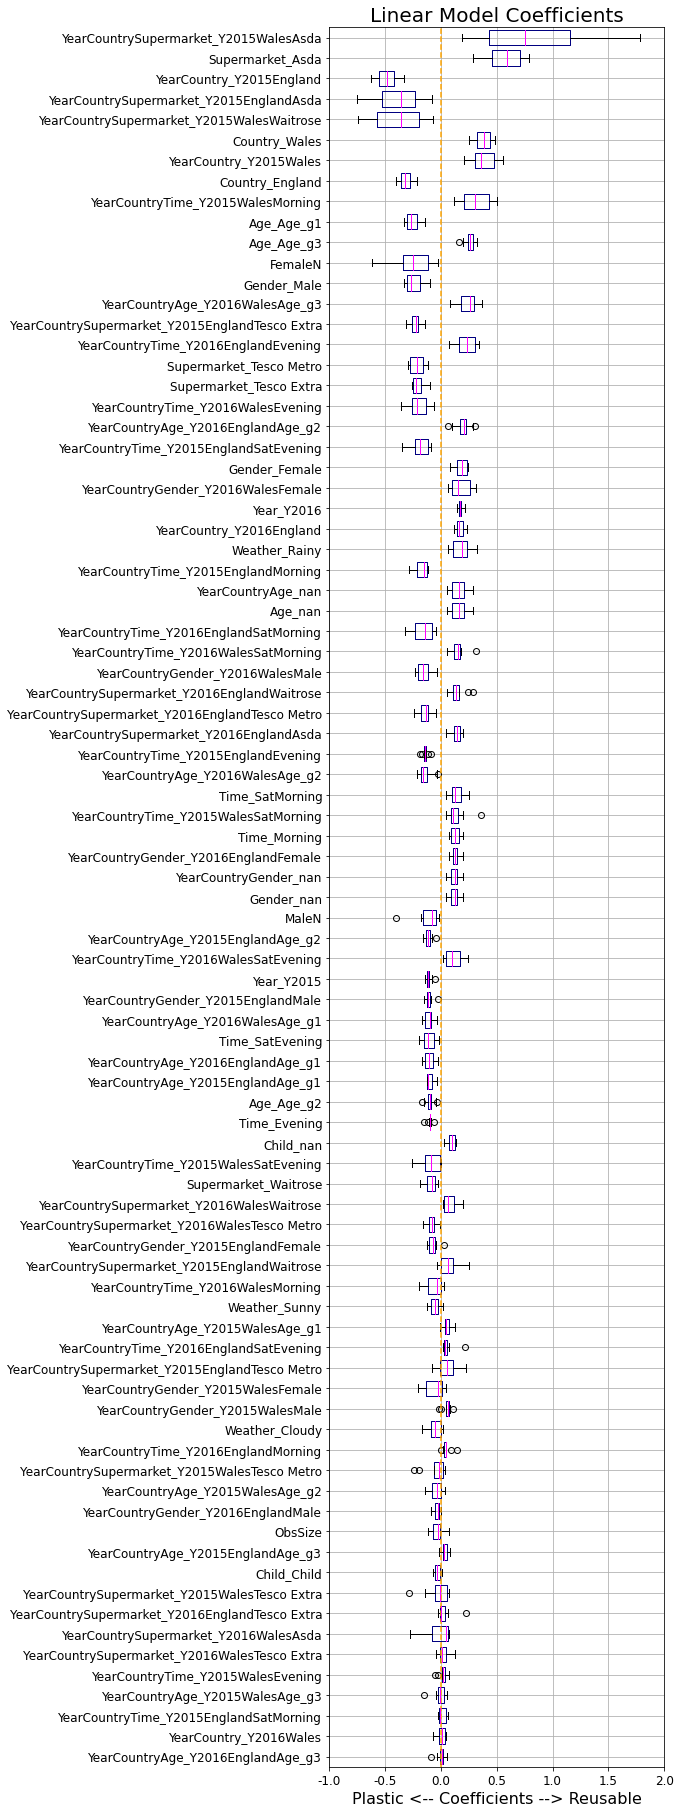

In [21]:
fig_box_lin_all85, ax_box_lin_all85 = plt.subplots()

Lin_coefs_df_all85 = Lin_coefs_df_ordered.iloc[:, ::-1]
Lin_coefs_df_all85.boxplot(ax = ax_box_lin_all85, 
                           widths = 0.75,
                           boxprops = {'color':'navy'}, 
                           medianprops = {'color':'magenta'}, 
                           whiskerprops = {'color':'black'}, 
                           vert = False)

ax_box_lin_all85.set_xticks(ax_box_lin_all85.get_xticks())
ax_box_lin_all85.set_yticks(ax_box_lin_all85.get_yticks())

xticks_lin_all85 = ax_box_lin_all85.get_xticks()
xticklabels_lin_all85 = [f"{x:.1f}" for x in xticks_lin_all85]

ax_box_lin_all85.set_xticklabels(xticklabels_lin_all85, fontsize = 12)
ax_box_lin_all85.set_yticklabels(ax_box_lin_all85.get_yticklabels(), fontsize = 12)

ax_box_lin_all85.set_xlabel("Plastic <-- Coefficients --> Reusable", 
                            fontsize = 16) 
#ax_box_lin_all85.set_ylabel("Feature Importance", fontsize = 12)
ax_box_lin_all85.set_title("Linear Model Coefficients", fontsize = 20)

ax_box_lin_all85.axvline(x = 0, 
                         color = "orange", 
                         linestyle = "dashed")

fig_box_lin_all85.set_size_inches([6, 32])

# save_figures
if save_figures:
    fig_name = f"{figure_path}Linear Model Coef All 85"
    fig_box_lin_all85.savefig(f"{fig_name}.pdf", 
                              dpi = 300, 
                              bbox_inches="tight")
    fig_box_lin_all85.savefig(f"{fig_name}.png", 
                              dpi = 300, 
                              bbox_inches="tight")
    fig_box_lin_all85.savefig(f"{fig_name}.svg", 
                              dpi = 300, 
                              bbox_inches="tight")